In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Position_Salaries.csv")
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
y = y.reshape(len(y),1)
print(x,y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [3]:
# FEATURE SCALING   here we are using F.S bcz DV and IDV have huge numerical differnce
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()  
scy = StandardScaler()  # both scy and scx have differnt mean and deviaiton thats why we use 2 objects

x= scx.fit_transform(x)
y = scy.fit_transform(y)

print(x)
print(y)



[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [4]:
from sklearn.svm import SVR
reg = SVR(kernel= 'rbf')   #The RBF kernel is a type of Gaussian kernel, which means it is based on a Gaussian probability distribution. The kernel function is defined as:
                           #K(x, y) = exp(-gamma ||x - y||^2)
#where x and y are the input data points, gamma is a hyperparameter that controls the width of the kernel, and ||.|| denotes the Euclidean distance between the two points i.e d = 2√(a2+b2)
#The RBF kernel measures the similarity between two data points based on their distance in the input space. Points that are close in the input space will have a high similarity score, while points that are far apart will have a low similarity score.
reg.fit(x,y) 


C:\Users\nehan.NITRO7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [14]:
# Finding the salary

scy.inverse_transform(reg.predict(scx.transform([[6.5]])).reshape(-1,1))


#since we scaled dv, now we have revert it to orignal form  using inv trans
# if we dont do inv trans on the output our final output will be scaled output which is unneeded
# since our regresion model take IV input in the scaled form + 2d-array we have to covert transform it to predict salary at 6.5 

array([[170370.0204065]])

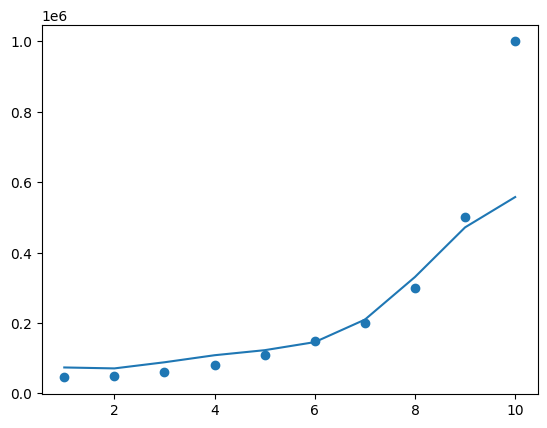

In [16]:
plt.scatter(scx.inverse_transform(x),scy.inverse_transform(y))

plt.plot(scx.inverse_transform(x),scy.inverse_transform(reg.predict(x).reshape(-1,1)))
plt.show()

#predict function wants scaled IV as input bcz we made our model using scaled values
# in plot function we give unscaled data bcz we want to visualize actual data 


[[1. ]
 [1.1]
 [1.2]
 [1.3]
 [1.4]
 [1.5]
 [1.6]
 [1.7]
 [1.8]
 [1.9]
 [2. ]
 [2.1]
 [2.2]
 [2.3]
 [2.4]
 [2.5]
 [2.6]
 [2.7]
 [2.8]
 [2.9]
 [3. ]
 [3.1]
 [3.2]
 [3.3]
 [3.4]
 [3.5]
 [3.6]
 [3.7]
 [3.8]
 [3.9]
 [4. ]
 [4.1]
 [4.2]
 [4.3]
 [4.4]
 [4.5]
 [4.6]
 [4.7]
 [4.8]
 [4.9]
 [5. ]
 [5.1]
 [5.2]
 [5.3]
 [5.4]
 [5.5]
 [5.6]
 [5.7]
 [5.8]
 [5.9]
 [6. ]
 [6.1]
 [6.2]
 [6.3]
 [6.4]
 [6.5]
 [6.6]
 [6.7]
 [6.8]
 [6.9]
 [7. ]
 [7.1]
 [7.2]
 [7.3]
 [7.4]
 [7.5]
 [7.6]
 [7.7]
 [7.8]
 [7.9]
 [8. ]
 [8.1]
 [8.2]
 [8.3]
 [8.4]
 [8.5]
 [8.6]
 [8.7]
 [8.8]
 [8.9]
 [9. ]
 [9.1]
 [9.2]
 [9.3]
 [9.4]
 [9.5]
 [9.6]
 [9.7]
 [9.8]
 [9.9]]


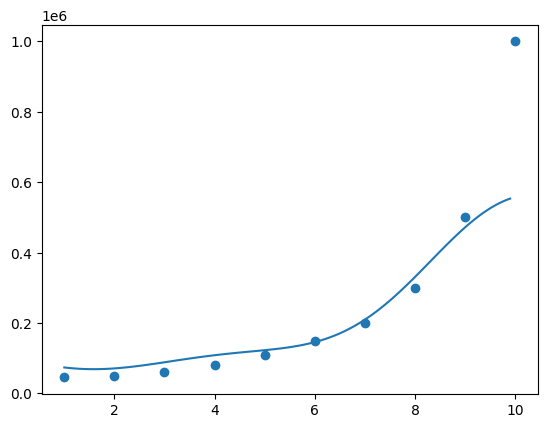

In [25]:
xg = np.arange(min(scx.inverse_transform(x)),max(scx.inverse_transform(x)),0.1)
xg= xg.reshape(len(xg),1)
print(xg)

plt.scatter(scx.inverse_transform(x),scy.inverse_transform(y))
plt.plot(xg,scy.inverse_transform(reg.predict(scx.transform(xg)).reshape(-1,1)))
plt.show()

#predict function wants scaled IV as input bcz we made our model using scaled values
# in plot function we give unscaled data bcz we want to visualize actual data 
